# OPTICS

In [534]:
%matplotlib inline

import os,sys,inspect
PATH = '/Users/gaetanoantonicchio/Documents/GitHub/DataMining-2'
sys.path.insert(0, PATH)

from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import normalize, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fma_metadata import utils
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [535]:
df = utils.load('/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/echonest.csv')

In [536]:
tracks= utils.load('/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/tracks.csv')

In [537]:
genres = tracks['track']['genre_top']

In [538]:
df = df['echonest']['audio_features']

In [539]:
df.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [540]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

### Filtering dataset 

In [545]:
X['genre_top'].value_counts()

Rock                   3892
Electronic             2170
Hip-Hop                 910
Folk                    874
Old-Time / Historic     357
Pop                     346
Classical               265
Jazz                    241
International           133
Instrumental             84
Blues                    66
Experimental             17
Country                   0
Easy Listening            0
Soul-RnB                  0
Spoken                    0
Name: genre_top, dtype: int64

### Selecting only Classical songs

In [541]:
X = df.merge(genres, on='track_id')

In [550]:
X_classical = X[X['genre_top']=='Classical'].iloc[:,:-1]

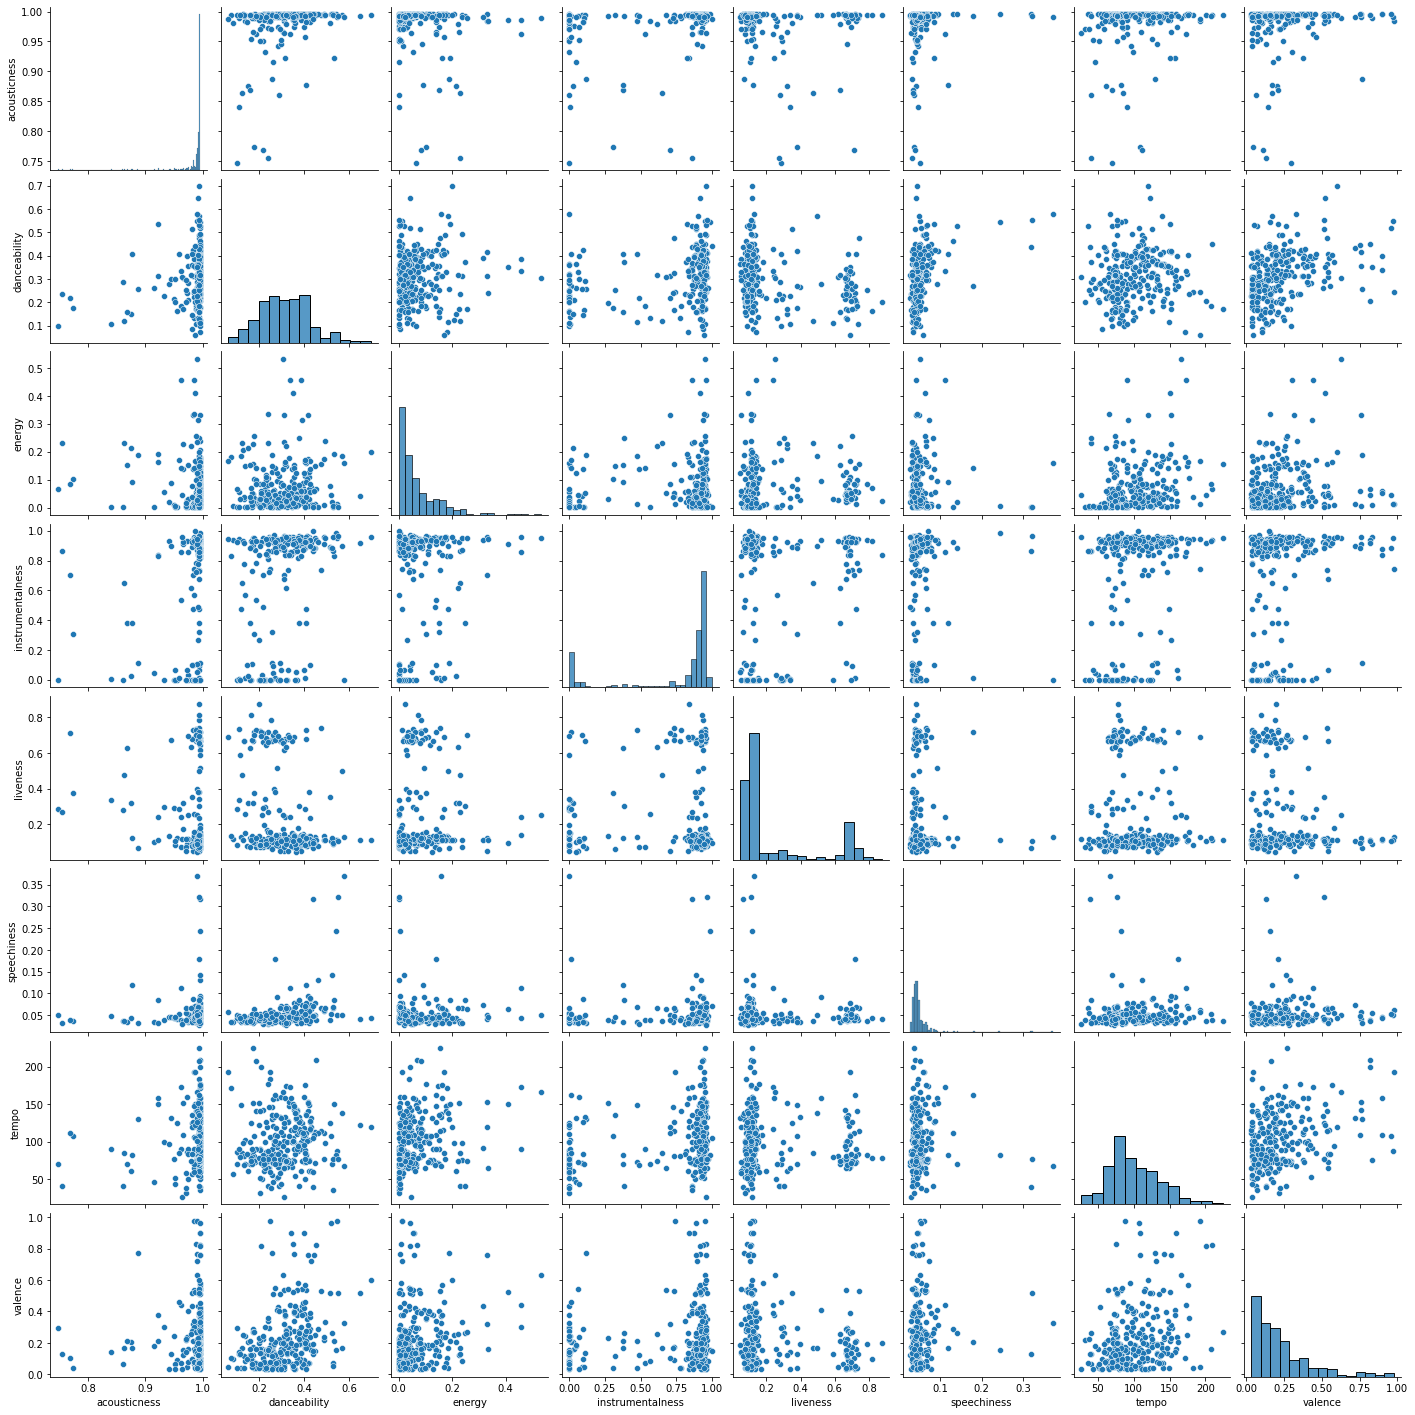

In [551]:
sns.pairplot(X_classical)

### Selecting only Danceability and Liveness

In [552]:
X_filter = X_classical[['danceability', 'liveness']]

**LIVENESS** : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live<br>
**DANCEABILITY**: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

### Normalize the dataset

In [553]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filter)
  
# Normalizing the data so that the data
# approximately follows a Gaussian distribution
#X_normalized = normalize(X_scaled)
X_normalized = X_scaled 
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized, index=X_filter.index)
  
# Renaming the columns
X_normalized.columns = X_filter.columns
  
X_normalized.head()

,danceability,liveness
track_id,,
4850,0.557136,-0.494669
4851,-0.282809,-0.653288
10026,1.097773,-0.494063
10027,-0.120873,-0.759145
10028,0.674551,-0.610682


### OPTICS

In [554]:
from sklearn.cluster import OPTICS

In [634]:
help(OPTICS)

Help on class OPTICS in module sklearn.cluster._optics:

class OPTICS(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  OPTICS(*, min_samples=5, max_eps=inf, metric='minkowski', p=2, metric_params=None, cluster_method='xi', eps=None, xi=0.05, predecessor_correction=True, min_cluster_size=None, algorithm='auto', leaf_size=30, n_jobs=None)
 |  
 |  Estimate clustering structure from vector array.
 |  
 |  OPTICS (Ordering Points To Identify the Clustering Structure), closely
 |  related to DBSCAN, finds core sample of high density and expands clusters
 |  from them [1]_. Unlike DBSCAN, keeps cluster hierarchy for a variable
 |  neighborhood radius. Better suited for usage on large datasets than the
 |  current sklearn implementation of DBSCAN.
 |  
 |  Clusters are then extracted using a DBSCAN-like method
 |  (cluster_method = 'dbscan') or an automatic
 |  technique proposed in [1]_ (cluster_method = 'xi').
 |  
 |  This implementation deviates from the original OPTICS by first

In [637]:
sil = []
for i in range(2, 20):
    # Building the OPTICS Clustering model
    optics_model = OPTICS(min_samples=i, metric='euclidean')            # GOOD Results: min_samples: 13  
    # Training the model
    optics_model.fit(X_normalized)
    sil.append(silhouette_score(X_normalized, optics_model.labels_))

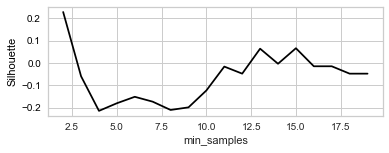

In [645]:
fig, ax1 = plt.subplots(figsize=(6,2))
t = np.arange(2,20,1)
color='tab:blue'

color = 'black'
ax1.set_ylabel('Silhouette', color=color)
ax1.set_xlabel('min_samples')
ax1.plot(t, sil, color=color)
ax1.tick_params(axis='y', labelcolor=color)

The optimal values of min samples is 13 and 15. We decided to use 13

In [619]:
# Building the OPTICS Clustering model
optics_model = OPTICS(min_samples=13, metric='euclidean')            # GOOD Results: min_samples: 13
  
# Training the model
optics_model.fit(X_normalized)

OPTICS(metric='euclidean', min_samples=13)

In [620]:
optics_model.labels_

array([-1, -1, -1, -1, -1,  1,  0,  3, -1, -1, -1, -1,  4,  4,  4,  4,  4,
        4,  4,  0,  1, -1, -1,  3,  0, -1, -1, -1, -1, -1, -1,  4,  0,  3,
       -1,  3,  0, -1, -1, -1,  3, -1,  1, -1, -1,  1, -1,  1, -1,  2,  1,
        1, -1, -1,  2,  1, -1,  2,  1,  1,  1,  1,  1,  0, -1, -1, -1,  1,
        3,  3,  3,  1,  0, -1, -1,  1,  2,  0, -1,  2,  3, -1, -1,  2, -1,
       -1,  1, -1,  2, -1,  2,  3, -1, -1, -1, -1, -1, -1,  1,  3, -1,  4,
        4, -1, -1,  2, -1, -1,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4, -1,  3,  0,  3, -1,  2, -1,  3,  3, -1,
        4, -1, -1, -1, -1, -1, -1,  1, -1,  0, -1,  3, -1,  2, -1, -1,  1,
        0,  4,  4,  4, -1, -1,  4, -1,  1, -1, -1, -1,  1, -1, -1,  2,  3,
       -1, -1,  1, -1,  0,  2,  1,  1,  3, -1,  1, -1, -1, -1, -1, -1, -1,
        1,  1, -1, -1, -1, -1, -1,  2,  2,  1, -1,  1, -1, -1, -1,  3,  1,
       -1,  3,  3,  2, -1, -1,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4

In [621]:
# Producing the labels according to the DBSCAN technique with eps = 0.5
labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_,
                                   core_distances = optics_model.core_distances_,
                                   ordering = optics_model.ordering_, eps = 0.5)
  
# Producing the labels according to the DBSCAN technique with eps = 1.0
labels2 = cluster_optics_dbscan(reachability = optics_model.reachability_,
                                   core_distances = optics_model.core_distances_,
                                   ordering = optics_model.ordering_, eps = 1)
  

# Creating a numpy array with numbers at equal spaces till
# the specified range
space = np.arange(len(X_normalized))
  
# Storing the reachability distance of each point
reachability = optics_model.reachability_[optics_model.ordering_]
  
# Storing the cluster labels of each point
labels = optics_model.labels_[optics_model.ordering_]
  
print(labels)

[-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4 -1 -1
 -1]


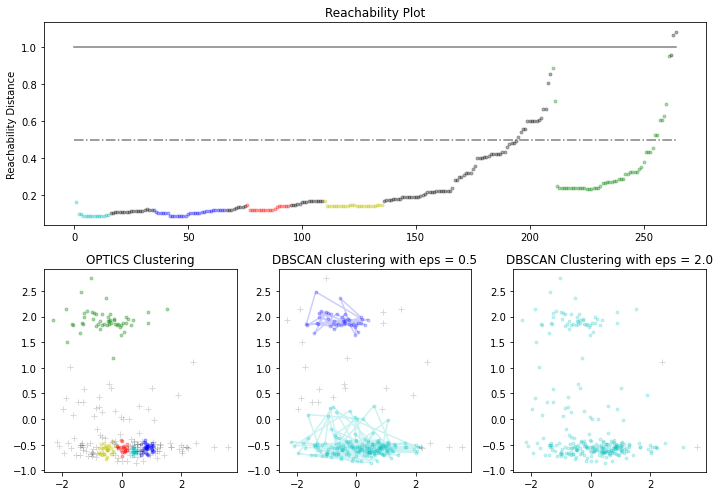

In [622]:
# Defining the framework of the visualization
plt.figure(figsize =(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Plotting the Reachability-Distance Plot
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
    Xk = space[labels == Class]
    Rk = reachability[labels == Class]
    ax1.plot(Xk, Rk, colour, alpha = 0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3)
ax1.plot(space, np.full_like(space, 1., dtype = float), 'k-', alpha = 0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5)
ax1.set_ylabel('Reachability Distance')
ax1.set_title('Reachability Plot')

# Plotting the OPTICS Clustering
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
    Xk = X_normalized[optics_model.labels_ == Class]
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.')

ax2.plot(X_normalized.iloc[optics_model.labels_ == -1, 0],
    X_normalized.iloc[optics_model.labels_ == -1, 1],
    'k+', alpha = 0.15)
ax2.set_title('OPTICS Clustering')

# Plotting the DBSCAN Clustering with eps = 0.5
colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow']
for Class, colour in zip(range(0, 6), colors):
    Xk = X_normalized[labels1 == Class]
    ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.2, marker ='.')

ax3.plot(X_normalized.iloc[labels1 == -1, 0],
        X_normalized.iloc[labels1 == -1, 1],
        'k+', alpha = 0.15)
ax3.set_title('DBSCAN clustering with eps = 0.5')

# Plotting the DBSCAN Clustering with eps = 2.0
colors = ['c.', 'y.', 'm.', 'g.']
for Class, colour in zip(range(0, 4), colors):
    Xk = X_normalized.iloc[labels2 == Class]
    ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.2, marker ='.')

ax4.plot(X_normalized.iloc[labels2 == -1, 0],
        X_normalized.iloc[labels2 == -1, 1],
        'k+', alpha = 0.15)
ax4.set_title('DBSCAN Clustering with eps = 2.0')


plt.tight_layout()
plt.show()


#### Observations:

OPTICS identifies 4 clusters in Classical songs. 
An objective cluster identified by both DBSCAN adn OPTICS is the one in the top left corner, which represents classical songs with high danceability and low liveness. Since the other 4 clusters have low danceability, in the cluster in green we identify all classical tracks that are more likely to be danced.
Regarding the three cluster (yellow, red, blue, cyan) we noticed how OPTICS was able to disistinguish clusters in an area with different density. Instead DBSCAN, group all those tracks in one single cluster, highlighting its difficulty in recognizing clusters when the density is not constant. 

In [623]:
from sklearn.metrics import silhouette_score

In [628]:
silhouette_score(X_normalized, optics_model.labels_ )

0.06368533662265091